In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3    ## SQL Interface
import pickle     ## Used to save your data - Converts objects to byte stream and vice versa

from sklearn.feature_extraction.text import CountVectorizer  ## BOW Model
from sklearn.feature_extraction.text import TfidfVectorizer  ## TFIDF Model

from sklearn.manifold import TSNE    ## To visualize high dimensional data

## Modules to perform Text Preprocessing


In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
conn = sqlite3.connect('mail.sqlite')

df= pd.read_sql_query("""SELECT * FROM mail""", conn)

df.head()

,level_0,index,mail,score,Cleanedmail
0,0,0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,1,1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,2,2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,3,3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,4,4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...


In [4]:
df.drop(['index'],axis=1,inplace=True)

In [5]:
df.head()

,level_0,mail,score,Cleanedmail
0,0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...


In [6]:
df.drop(['level_0'],axis=1,inplace=True)

In [7]:
df.head()

,mail,score,Cleanedmail
0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0,deat sun dec est michael subject queri wlodek ...
1,"discussion s - > np + np remind ago read , sou...",0,discuss remind ago read sourc forget critiqu n...
2,". . . 's much restrictive s - > np np . 's "" ""...",0,much restrict pro quit
3,""" listserv "" international conference 1992 sec...",0,listserv intern confer second circular februar...
4,anyone point book article causative constructi...,0,anyon point book articl causat construct korea...


In [8]:
df.shape

(962, 3)

## Shuffling

In [9]:
from sklearn.utils import shuffle

In [10]:
df = shuffle(df, random_state=24)
df.head()

,mail,score,Cleanedmail
237,update 1 / 19 / 95 ( include session ) * * * *...,0,updat includ session georgetown linguist socie...
811,conquer thinning hair dandruff problems foreve...,1,conquer thin hair dandruff problem forev hair ...
201,"hebrew bible , verb berek usually means "" bles...",0,hebrew bibl verb berek usual mean bless howev ...
105,teach english korea language center chonnam na...,0,teach english korea languag center chonnam nat...
25,"humanist discussion group , vol . 5 , . 0856 ....",0,humanist discuss group vol monday apr seek vol...


## Using TFIDF vector

In [11]:
tf_idf_vect = TfidfVectorizer()
tf_idf = tf_idf_vect.fit_transform(df['Cleanedmail'].values)
tf_idf.shape

(962, 18947)

In [12]:
X=tf_idf
y=df["score"].values

## Traning and Testing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False)


The optimal value of alpha is0.1


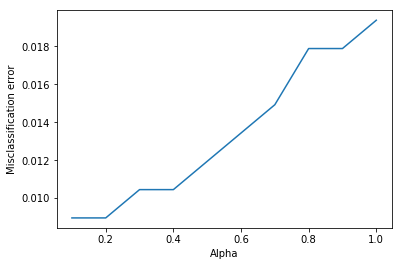

In [15]:
alpha= np.linspace(0.1,1,10)
cv_scores=[]

for a in alpha:
    clf=MultinomialNB(alpha=a)
    scores=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

MSE=[1 - x for x in cv_scores]

optimal_alpha= alpha[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is{}'.format(optimal_alpha))

plt.plot(alpha,MSE)
plt.xlabel('Alpha')
plt.ylabel('Misclassification error')
plt.show()
    

## Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix


In [17]:
clf=MultinomialNB(alpha=optimal_alpha)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
confusion_matrix(y_test,y_pred).T

98.2698961938


array([[158,   1],
       [  4, 126]], dtype=int64)

In [19]:
idx=(-clf.feature_log_prob_).argsort()[:2,:50]
print("top 50 words in SPAM")
for i in idx[0]:
    print(tf_idf_vect.get_feature_names()[i])
print("\n******")
print("top 50 words in positive HAM")
for i in idx[1]:
    print(tf_idf_vect.get_feature_names()[i])

top 50 words in SPAM
languag
linguist
univers
paper
confer
english
edu
abstract
inform
research
discuss
workshop
book
fax
one
grammar
interest
present
submiss
phonolog
address
mean
depart
pleas
theori
teach
issu
refer
word
thank
send
session
speech
post
speaker
studi
student
exampl
semant
work
registr
acquisit
includ
follow
institut
comput
form
list
public
scienc

******
top 50 words in positive HAM
mail
report
order
free
http
email
address
com
site
remov
money
program
list
click
busi
send
receiv
call
name
internet
pleas
adult
web
inform
work
week
www
market
one
servic
credit
check
want
million
video
day
product
advertis
live
sex
softwar
offer
start
card
visit
earn
need
messag
sell
compani
